In [2]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
%matplotlib inline

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [ ]:
clu = [2,3,4]
feat = np.arange(2,1000)
obs = [10, 50, 100, 200]
com = list(itertools.product(obs, clu, feat))
rand = 0
kac = 0

for x in range(3):
    for w in range(len(com)):
        data, y = make_blobs(n_samples=com[w][0], centers=com[w][1], n_features=com[w][2])
        results=cl.use_kmeans(data, y)
        rand = rand + results[1]
        
        if results[2] == com[w][1]:
            kac= kac+1
print("average rand" + str(rand/100))
print("k accuracy" + str(kac/100))

In [ ]:
data, y = make_blobs(n_samples=9, centers=50, n_features=6)

In [3]:
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 25
m_neurons = 25
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2884996390558909


In [4]:
#label_set = set(y)
#label_dict = dict(zip(label_set, range(len(label_set))))
#target = np.array([label_dict[label] for label in y])

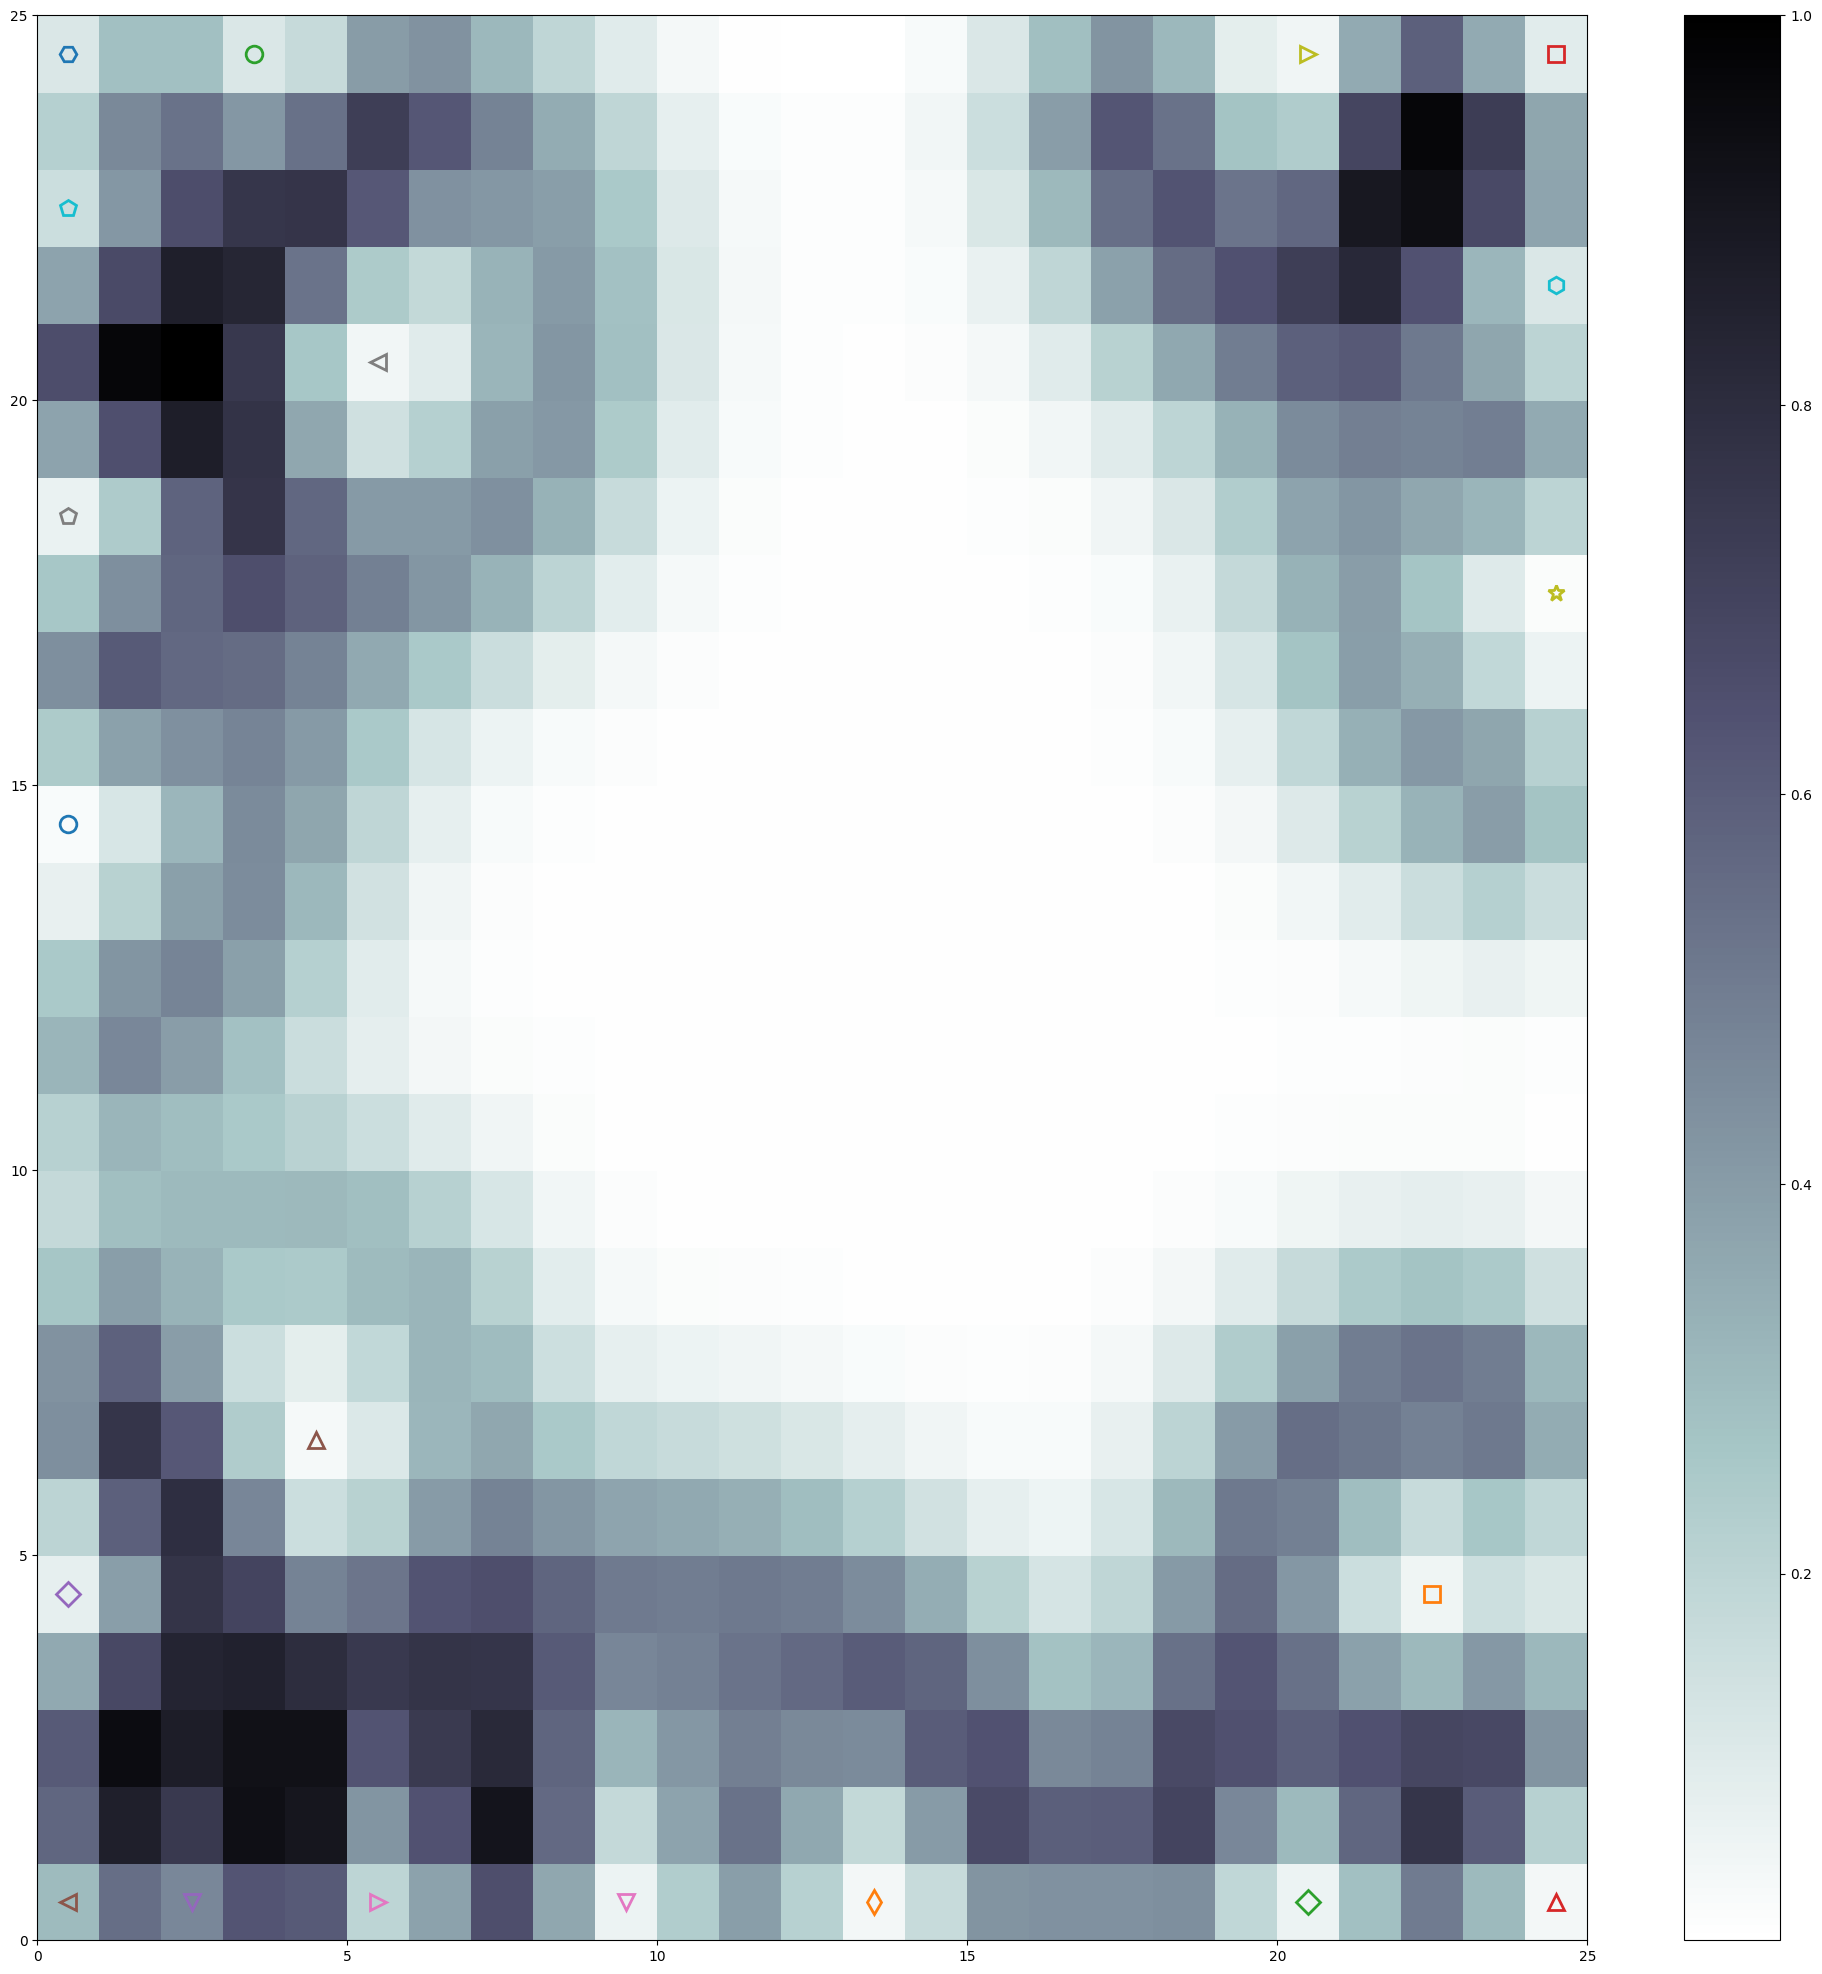

In [5]:
# Define the colormap with as many colors as there are unique labels
colors = ['C{}'.format(i) for i in range(len(np.unique(y)))]
cmap = ListedColormap(colors)

# Create the plot
plt.figure(figsize=(n_neurons, m_neurons))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the dataset
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'd']
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    # place a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y[cnt] % len(markers)], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)

plt.show()


In [6]:
# normalize the data
data = cl.normalize(data)

Create data and data labels for each point

In [7]:
k = cl.K(data)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=5)

In [8]:
#cl.plotKMeans(data, kmeans.labels_, None)
cl.plotKMeans(data, kmeans.labels_, y)

ValueError: too many values to unpack (expected 2)

In [ ]:
cl.plotKMeans(data, kmeans.labels_)
#cl.plotKMeans(data, kmeans.labels_, y)

In [ ]:
print(y)
print(kmeans.labels_)

In [ ]:
cl.labelClusters(kmeans.labels_, y)

In [ ]:
cl.getClusters(data, y)

In [ ]:
cl.randIndex(kmeans.labels_, y)

In [ ]:
cl.plotKMeans(data, kmeans.labels_)

In [ ]:
cl.plotKMeans(data, y)

In [ ]:
def use_kmeans(da, la):
    k = cl.K(data)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(da)
    
    #cl.plotKMeans(data, tlabels)
    
    return kmeans, cl.randIndex(kmeans.labels_, la), k

In [ ]:
use_kmeans(data, y)

In [ ]:
som.winner(data[0])

In [ ]:
somlist = []

In [ ]:
#MAKE BMU LIST
for x in range(len(data)):
    somlist.append(som.winner(data[x]))
print(somlist)

In [ ]:
use_kmeans(somlist, y)

In [ ]:
use_kmeans(somlist, kmeans.labels_)

In [ ]:
print(somlist)